In [83]:
import pandas as pd 
 
df = pd.read_csv(r'C:\Users\hp\Music\data\togo-dapaong_qc.csv', encoding='latin-1')

In [84]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [85]:
df.describe().T
df.isna().mean()[df.isna().mean()>0.05]

Comments    1.0
dtype: float64

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")



df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("Benin Data Loaded:", df.shape)

# 2. SUMMARY STATS & MISSING VALUES
print("\nSUMMARY STATISTICS")
display(df.describe().T)

print("\nMISSING VALUES (>5%)")
missing = df.isna().mean()
print(missing[missing > 0.05])

# 3. OUTLIER DETECTION (Z-SCORE)
cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
df_z = df[cols].copy()
z_scores = np.abs(stats.zscore(df_z.select_dtypes(include=np.number)))
df['outlier'] = (z_scores > 3).any(axis=1)

print(f"\nOutliers detected: {df['outlier'].sum()} rows")

# 4. CLEANING
df_clean = df[~df['outlier']].copy()
df_clean[cols] = df_clean[cols].fillna(df_clean[cols].median())



# 5. EXPORT CLEANED DATA
df_clean.to_csv('../data/togo_clean.csv', index=False)
print("benin_clean.csv SAVED")



Benin Data Loaded: (525600, 19)

SUMMARY STATISTICS


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-25 12:00:30.000000768,2021-10-25 00:01:00,2022-01-24 06:00:45,2022-04-25 12:00:30,2022-07-25 18:00:15,2022-10-25 00:00:00,NaN
GHI,525600.0,230.55504,-12.7,-2.2,2.1,442.4,1424.0,322.532347
DNI,525600.0,151.258469,0.0,0.0,0.0,246.4,1004.5,250.956962
DHI,525600.0,116.444352,0.0,0.0,2.5,215.7,805.7,156.520714
ModA,525600.0,226.144375,0.0,0.0,4.4,422.525,1380.0,317.346938
ModB,525600.0,219.568588,0.0,0.0,4.3,411.0,1367.0,307.93251
Tamb,525600.0,27.751788,14.9,24.2,27.2,31.1,41.4,4.758023
RH,525600.0,55.01316,3.3,26.5,59.3,80.8,99.8,28.778732
WS,525600.0,2.368093,0.0,1.4,2.2,3.2,16.1,1.462668
WSgust,525600.0,3.22949,0.0,1.9,2.9,4.4,23.1,1.882565



MISSING VALUES (>5%)
Comments    1.0
dtype: float64

Outliers detected: 9251 rows
benin_clean.csv SAVED


In [87]:
#TIME SERIES
plt.figure(figsize=(12,5))
df_clean.set_index('Timestamp')[['GHI','DNI','DHI']].resample('D').mean().plot()
plt.title('Daily Solar Irradiance – sierraleone')
plt.ylabel('W/m²')
plt.savefig('../notebooks/data/togo_graph.png', format='png', dpi=200)
plt.close()
plt.show()

<Figure size 1200x500 with 0 Axes>

In [88]:
#CLEANING IMPACT
clean_impact = df_clean.groupby('Cleaning')[['ModA','ModB']].mean()
clean_impact.plot(kind='bar', title='ModA/ModB: Clean vs Dirty')
plt.ylabel('Average Reading')
plt.savefig('../notebooks/data/togo_graph.png', format='png', dpi=200)
plt.close()
plt.show()

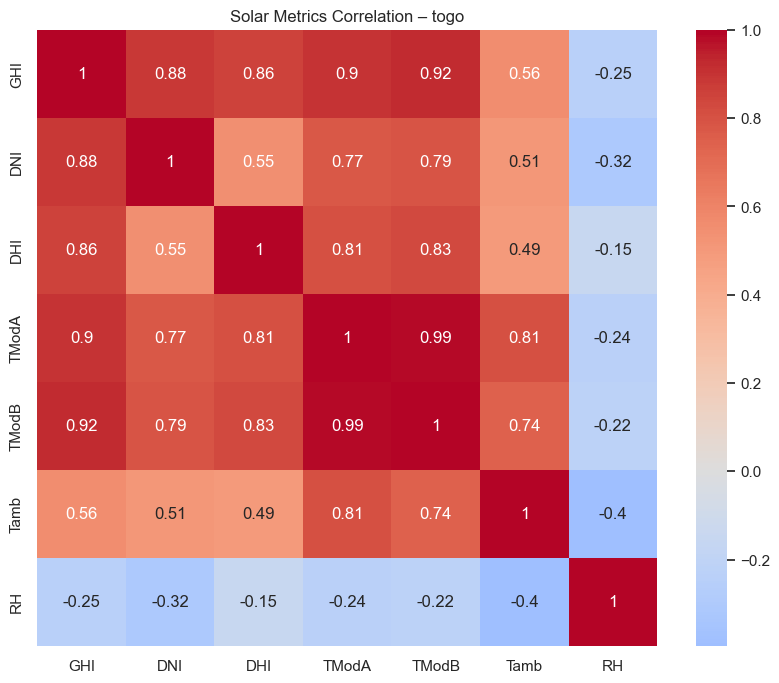

In [89]:
#CORRELATION HEATMAP
plt.figure(figsize=(10,8))
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB','Tamb','RH']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Solar Metrics Correlation – togo')
plt.savefig('../notebooks/data/togo_graph.png', format='png', dpi=200)

plt.show()

In [90]:
#SCATTER: Wind vs GHI
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='WS', y='GHI', hue='Cleaning', alpha=0.6)
plt.title('Wind Speed vs GHI (color = cleaning event)')
plt.savefig('../notebooks/data/togo_graph.png', format='png', dpi=200)
plt.close()
plt.show()

In [91]:
#WIND ROSE (SIMPLE)
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
directions = np.radians(df_clean['WD'])
speeds = df_clean['WS']
ax.scatter(directions, speeds, c=speeds, cmap='viridis', alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.title('Wind Rose – togo')
plt.savefig('../notebooks/data/togo_graph.png', format='png', dpi=200)
plt.close()
plt.show()

In [92]:
#HISTOGRAMS
sns.set(rc={'figure.figsize':(12,4)})
df_clean['GHI'].hist(bins=50, alpha=0.7, label='GHI')
df_clean['WS'].hist(bins=50, alpha=0.7, label='WS')
plt.legend()
plt.title('Distribution: GHI & Wind Speed')
plt.savefig('../notebooks/data/togo_graph.png', format='png', dpi=200)
plt.close()
plt.show()

In [93]:
#BUBBLE CHART: GHI vs Temp (bubble = Humidity)
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_clean, x='Tamb', y='GHI', size='RH',
                sizes=(20, 200), alpha=0.6, hue='RH', palette='Blues')
plt.title('GHI vs Temperature – Bubble = Relative Humidity')
plt.savefig('../notebooks/data/togo_graph.png', format='png', dpi=200)
plt.close()
plt.show()

In [94]:
# Create a figure with subplots for multiple box plots
plt.figure(figsize=(12, 6))

# Box plot for Temperature (Tamb)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
df.boxplot(column='Tamb')
plt.title('Temperature (Tamb) Box Plot')

# Box plot for Humidity (RH)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
df.boxplot(column='RH')
plt.title('Humidity (RH) Box Plot')

# Show the plots
plt.tight_layout()
plt.savefig('../notebooks/data/togo_graph.png', format='png', dpi=200)
plt.close()
plt.show()

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,4)})
df.set_index('Timestamp')[['GHI','DNI','DHI']].plot(); plt.title('Benin Irradiance')
plt.savefig('../notebooks/data/togo_graph.png', format='png', dpi=200)
plt.close()
plt.show()
sns.heatmap(df[['GHI','DNI','DHI','Tamb','RH']].corr(), annot=True, cmap='coolwarm')
plt.savefig('../notebooks/data/togo_graph.png', format='png', dpi=200)
plt.close()
plt.show()
